In [8]:
# CO line conversions routines 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

In [10]:
cosmo = FlatLambdaCDM(H0=67.4 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.315)

In [11]:
# Table 4 from Bothwell

J = np.array([2,3,4,5,6,7])



r_J = np.array([0.84,0.52,0.41,0.32,0.21,0.18])
r_J_err = np.array([0.13,0.09,0.07,0.05,0.04,0.04])

invr_J = 1./r_J 
invr_J_err = 1/r_J * np.sqrt((r_J_err/r_J)**2)


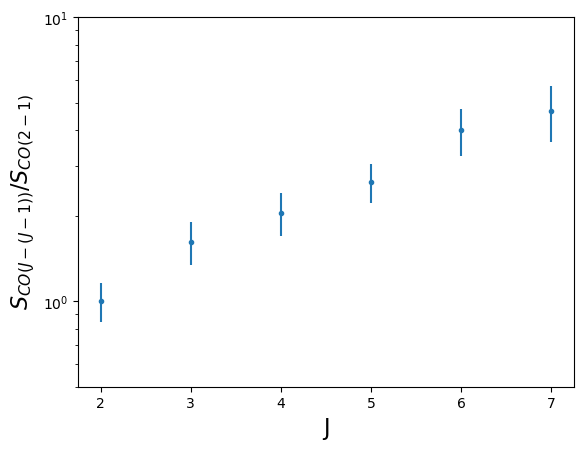

In [12]:
plt.errorbar(J,invr_J*0.84,yerr=invr_J_err*0.84,fmt=".")
#plt.errorbar(1,1,yerr=0,fmt=".")

plt.ylabel("$S_{CO(J-(J-1))}$/$S_{CO(2-1)}$",fontsize=16)
plt.xlabel("J",fontsize=16)

plt.ylim(0.5,10)
plt.yscale("log")

In [13]:
#Conversion from J-(J-1) to 1-0
def toC10(J,S,S_err):
    """
    Converts from a line flux J-(J-1) to 1-0 using
    Bothwell et al. 2013 Table 4 (MNRAS 429 3047)
    
    J: CO upper line transition [2,3,4,5,6,7] (int)
    S: CO line flux [Jy km/s] (float)
    S_err: CO line flux uncertainty [Jy km/s](float)
    
    usage: for example to convert a line flux from
    CO(3-2) that has flux 10 pm 1 (Jy km/s) we use 
    toC10(3,10,1)
    """
    val = np.array([0.84,0.52,0.41,0.32,0.21,0.18])
    err = np.array([0.13,0.09,0.07,0.05,0.04,0.04])
    
    S_c = val[J-2]*S
    S_c_err = S_c*np.sqrt((S_err/S)**2+(err[J-2]/val[J-2])**2)
    return S_c,S_c_err


In [15]:
def LpCO(I,nu,z):
    """
    Calculates the Apparent CO line Luminosity from the line intensity, 
    frequency and redshift assuming a Planck Cosmology framework
    
    I: CO(1-0) line intensity [Jy km/s]
    nu: Frequency [GHz]
    z: redshift
    
    return: Apparent Luminosity of the CO emission line [K km/s pc^2]
    """
    DL = cosmo.luminosity_distance(1+z).value
    return 3.25e7*I*(nu**(-2))*(DL**2)*((1+z)**(-3))

In [16]:
cosmo.luminosity_distance(1+2).value 

26018.354552401575

In [18]:
LpCO(10,90,3)*1e-11

8.422228173871058